# Overview of Data Augmentation:

Data Augmentation is the process of altering or corrupting an image so that it can be used for deep learning networks to generalize their objective. Highly essential for generative modelling networks such as GANs. Augmentation technique differs for different models and are used accordingly.

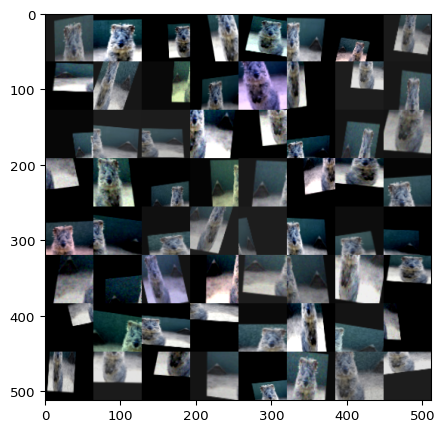

In [2]:
#Importing the required modules
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np

#Selecting seed value for augmentation
ia.seed(1)

#Creating augmentation for batch of 100 images 
images = np.array([ia.quokka(size=(64,64)) for _ in range(100)], dtype=np.uint8)

#Creating a transformer method for the image augmentation
seq = iaa.Sequential([
    iaa.Fliplr(0.5), #Flips horizontally
    iaa.Crop(percent=(0, 0.1)), #Performs random cropping on the image
    iaa.GaussianBlur(sigma=(0, 0.5)), #Performs Gaussian Blur to 50% of the image
    iaa.ContrastNormalization((0.75, 1.5)), #Strengthens or Weakens contrast in each image
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), #Adds Gaussian Noise to the image
    iaa.Multiply((0.8, 1.2), per_channel=0.2), #Makes images brighter or darker
    iaa.Affine #Performs affine transformations as provided
    (
        scale = {'x': (0.5, 1.5), "y": (0.5, 1.5)},
        translate_percent = {"x": (-0.5, 0.5), "y": (-0.5, 0.5)},
        rotate = (-10, 10),
        shear = (-10, 10)
    )
], random_order = True) #So that the provided augmentations take place randomly for every image

#Displaying the augmented images in a window
images_aug = seq.augment_images(images)
seq.show_grid(images[0], cols=8, rows=8)